# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction-to-networks" data-toc-modified-id="Introduction-to-networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to networks</a></div><div class="lev2 toc-item"><a href="#Networks-and-graph-theory" data-toc-modified-id="Networks-and-graph-theory-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Networks and graph theory</a></div><div class="lev2 toc-item"><a href="#Networks-in-Python" data-toc-modified-id="Networks-in-Python-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Networks in Python</a></div><div class="lev1 toc-item"><a href="#Creating-graphs" data-toc-modified-id="Creating-graphs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating graphs</a></div><div class="lev2 toc-item"><a href="#Creating-graphs-manually" data-toc-modified-id="Creating-graphs-manually-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating graphs manually</a></div><div class="lev2 toc-item"><a href="#Creating-graphs-using-generator-functions" data-toc-modified-id="Creating-graphs-using-generator-functions-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Creating graphs using generator functions</a></div><div class="lev3 toc-item"><a href="#Creating-new-graphs-from-existing-ones" data-toc-modified-id="Creating-new-graphs-from-existing-ones-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Creating new graphs from existing ones</a></div><div class="lev3 toc-item"><a href="#Creating-graphs-from-existing-blueprints" data-toc-modified-id="Creating-graphs-from-existing-blueprints-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Creating graphs from existing blueprints</a></div><div class="lev3 toc-item"><a href="#Creating-graphs-using-deterministic-generators" data-toc-modified-id="Creating-graphs-using-deterministic-generators-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Creating graphs using deterministic generators</a></div><div class="lev3 toc-item"><a href="#Creating-graphs-using-stochastic-generators" data-toc-modified-id="Creating-graphs-using-stochastic-generators-224"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Creating graphs using stochastic generators</a></div><div class="lev2 toc-item"><a href="#Creating-graphs-from-data" data-toc-modified-id="Creating-graphs-from-data-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Creating graphs from data</a></div><div class="lev1 toc-item"><a href="#Analyzing-graphs" data-toc-modified-id="Analyzing-graphs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyzing graphs</a></div><div class="lev2 toc-item"><a href="#Get-information-on-the-graph-level" data-toc-modified-id="Get-information-on-the-graph-level-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get information on the graph level</a></div><div class="lev2 toc-item"><a href="#Get-information-on-the-vertex-level" data-toc-modified-id="Get-information-on-the-vertex-level-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Get information on the vertex level</a></div><div class="lev1 toc-item"><a href="#Some-remarks-on-visualization" data-toc-modified-id="Some-remarks-on-visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Some remarks on visualization</a></div>

# Introduction to networks

## Networks and graph theory
Networks are a 'hot topic' in various disciplines, including mathematics, economics, sociology, political science, statistics and computeter science. 
Given the diversity of the disciplines involved it comes as no surprise that the terminology used by various scientists does not always align well.
Yet all investigations of networks somehow are built upon `graph theory`, a branch of discrete mathematics.

Therefore, to understand the following elaborations on how to implement and study networks in Python, a basic understanding of graph theory is very helpful.
I have started to write a script introducing the basics [here](http://claudius-graebner.com/_downloads/EE-Complexiy_script-networks.pdf).

Yet I can also recommend the following sources/textbooks:
* ['Networks' by Mark Newman](https://global.oup.com/academic/product/networks-9780198805090?q=Newman%20networks&lang=en&cc=at), an extremely prominant introductory textbook written from a physics point of view
* [The graduate course by Aaron Clauset](http://tuvalu.santafe.edu/~aaronc/courses/5352/), an open course by one of the leading network scholars, with very nice readings, yet most examples inpired by the natural sciences and statistics
* ['Graph Theory and Complex Networks' by Maarten van Steen](https://www.distributed-systems.net/index.php/books/gtcn/), a rather technical introduction to graph theory, which I found *extremely* useful, also to look up things. And its free;)

Some comments on the terminology before we move on:
the terms 'network theory' and 'graph theory' are not well distinguished.
Here we will use the term graph theory when we refer to the mathematical theory of graphs, where the latter are understood as mathematical objects.

The term 'network theory' will be used when we refer to the theory of networks, where the latter are understood as the relationships between real world entities.

Although this is the only distinction I can somehow make sense of, be aware that the literature uses both terms in various ways and it is not always straightforward to infer how.

## Networks in Python
As for most particular application areas, networks are best studied using the classes and functions provided by a specialized module. 
For the area of networks, a number of different libraries are available:
* [graph-tool](https://graph-tool.skewed.de/), not easy to set up, but very efficient with nice visualization.
* [networkx](https://networkx.github.io/), written in pure Python, which makes it slower, but straightforward to learn.
* [igraph](http://igraph.org/python/), very prominant and also available for R and C, so very useful when you work across languages. Focus on the empirical analysis
* [SNAP](https://snap.stanford.edu/snap/description.html), which also focuses on the empirical analysis and contains many example datasets
* and probably many more...

All of them come with particular advantages and disadvantages. 
Here we will use the library `networkx`, which is written in pure Python and which is particularly well-suited for beginners.
Yet, all of what you will learn in the context of networkx will also help you in working with the other libraries.

As for most other common libraries there exists a particular import convention for networkx:

In [53]:
import networkx as nx
# Not necessary, but will be used later:
import numpy as np 
import matplotlib.pyplot as plt 
% matplotlib inline

# Creating graphs
First we will learn how we create graph objects, which we then can analyze further.
As we know from theory, a simple graph $\mathcal{G}$ consists at least of a number of nodes and a number of edges. 
If not otherwise stated we will only think about *simple* graphs, and extend the thus acquired techniques to more complex graphs later.

We will consider the following three possibilities of creating simple graps:
* Create the graph manually
* Create the graph using a graph generator function
* Create the graph from network data

## Creating graphs manually
This is usually the least attractive option, but it is useful to get some intuition about the graph objects as provided by `networkx`.

We could procede by first creating an *empty graph* and then add vertices and edges:

In [104]:
g = nx.Graph() # create an empty graph
g.add_node("FirstNode")
g.add_edge(1, 2)
g.edges()

EdgeView([(1, 2)])

In [105]:
g.nodes()

NodeView(('FirstNode', 1, 2))

As we can see, we first created a single node called 'Firstnode'.
By adding an edge between the hitherto unexisting nodes '1' and '2', `networkx` automatically added the missing nodes to the graph. 

Although `networkx` is not well suited for visualization, we might have a look at our new graph:

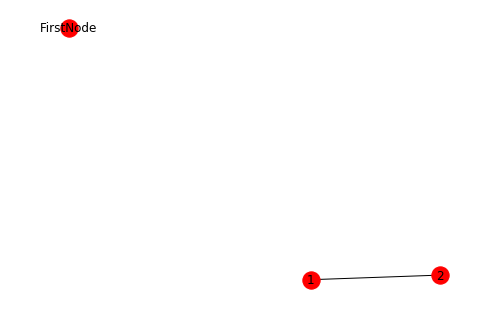

In [106]:
nx.draw(g, with_labels=True)

We can also create an empty graph, and then fill it with vertices and edges according to an *edge list':

[(1, 2), (2, 5), (4, 6)]
[1, 2, 4, 6, 5]


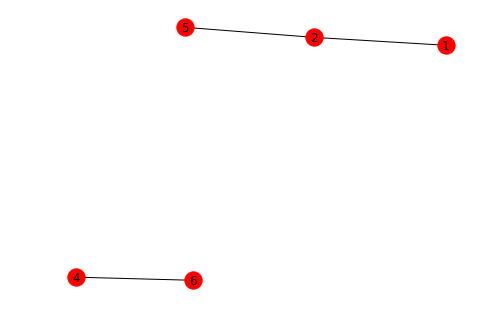

In [107]:
list_of_edges = [(1,2), (4,6), (2,5)]
g = nx.Graph()
g.add_edges_from(list_of_edges)
print(g.edges())
print(g.nodes())
nx.draw(g, with_labels=True)

It is useful to keep in mind that vertices can be anything: 
numbers, strings, instances of a class we have created before, or a collection of data.
This makes is easy, for example, to program agent-based models with an explicit network structure.

## Creating graphs using generator functions
There are a vast number of algorithms that produce particular graphs.
Many of these algorithms are implemented in `networkx` and can be used to create new graphs.

There are basically two types of generator functions:

1. Function that create a new graph from existing ones.
1. Functions that create a particular famous graph, e.g. the graph representing the Karate club network
2. Functions that produce a deterministic graph
3. Functions that produce a stochastic graph according to some parameter specifications

### Creating new graphs from existing ones
There are a number of functions that help you to create new graphs from existing ones.

For example, the **complement** of a graph $\mathcal{G}$ is usually denoted by $\mathcal{G}^C$ and has the same vertices, but all edges that were missing in 
$\mathcal{G}$ are present in $\mathcal{G}^C$.

We can get $\mathcal{G}^C$ the following way:

In [108]:
g_c = nx.complement(g)

Text(0.5,1,'The complement graph')

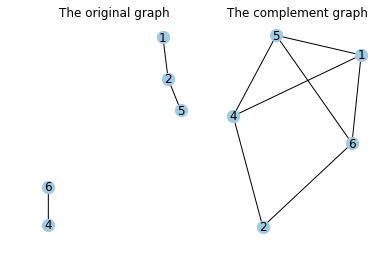

In [109]:
plt.subplot(121)
nx.draw(g,node_size=150,node_color='#A0CBE2', with_labels=True)
plt.title("The original graph")
plt.subplot(122)
nx.draw(g_c,node_size=150,node_color='#A0CBE2', with_labels=True)
plt.title("The complement graph")

We can also combine graphs, e.g. via the function `compose`:

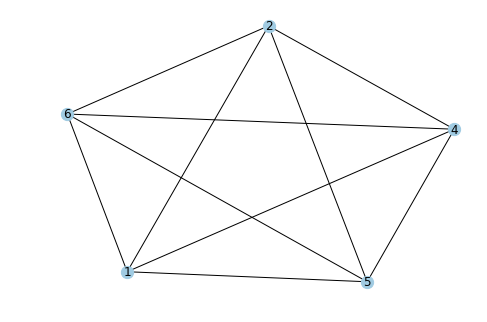

In [110]:
g_full = nx.compose(g, g_c)
nx.draw(g_full, node_size=150,node_color='#A0CBE2', with_labels=True) # obviously yields a complete graph

### Creating graphs from existing blueprints
There are a number of famous graphs that can be created using particular generator functions.

For example, the graph below is a representation of the marrying relationships between famous Florentine families in the 15th century:

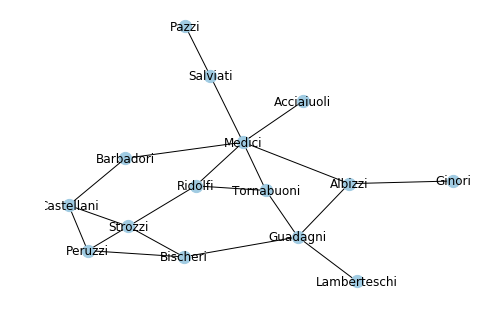

In [111]:
g_famous = nx.florentine_families_graph()
nx.draw(g_famous, node_size=150,node_color='#A0CBE2', with_labels=True) # obviously yields a complete graph

### Creating graphs using deterministic generators
There are some special graph generating algorithms that always produce the same graph for the same parametrization.

For example, the function `cycle_graph` takes one argument, the number of vertices, and then returns a cycle:

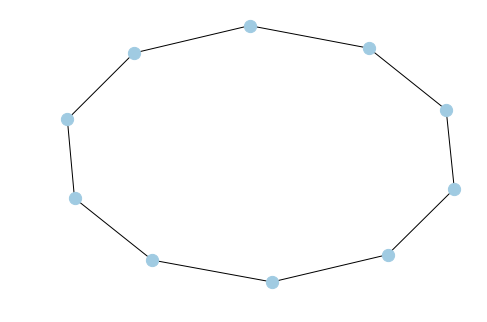

In [112]:
g_cylce = nx.cycle_graph(10)
nx.draw(g_cylce, node_size=150,node_color='#A0CBE2', with_labels=False) 

### Creating graphs using stochastic generators
It is also possible to generate graphs using a stochastic algorithm. 
Therefore, every instance produced by an algorithm, even for the same parametrization, will yield a different graph.

One of the most famous examples is the [Erdos-Renyi graph](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model).
Here, for a fixed number of vertices, every edge exists with a given probability $p$.

Here you see two graphs that both result from the same parametrization (i.e. 10 vertices, and $p=25\%$):

Text(0.5,1,'The second instance')

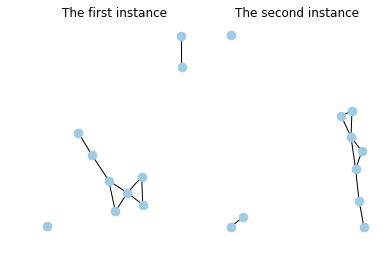

In [173]:
f

Stochastic graph models are widely used to test hypothesis about the mechanisms underlying graph generation in the real world:
by comparing random graphs with those observed in reality we can make statements about how likely a certain structure is the outcome of a particular random process.

For example, Erdos-Renyi graphs have certain particular properties, such as a Poisson-like degree distribution.
Social networks in the real world do not have such degree distribution.
We can, thus, conclude that social networks are not the outcome of rather random edge creations.

## Creating graphs from data
Finally, we want to create graphs from data. 
There are many different formats, which you might use to store your graphs.
For example, you can store the vertex and edge list in a text document, read this into python and then create the graph as illustrated above.

Yet, this is not practical, particularly for large graphs. 
Here, special formats for graphs are a better option.
Here we will read a graph, which is stored in the widely used and very practical GLM format.

You can download the data here.
I assume it is stored in a folder in you working directory, which is called 'output':

In [103]:
file_dir = "output/expl_graph.gml"
ex_graph = nx.read_gml(file_dir)

Conversely, if you want to **save a graph** in the GML formal you can do so using the following command:

In [102]:
# nx.write_gml(ex_graph, "output/test.gml")

# Analyzing graphs
Suppose you have created a graph by either of the means we have encountered so far.
Now you want to compute some of the standard descriptive statistics you have encountered in your theoretical lessons.

For the further work we will use the following graph (which can be downloaded [here](http://claudius-graebner.com/SummerCourseComplexity18.html)):

In [114]:
file_dir = "output/expl_graph.gml"
sim_graph = nx.read_gml(file_dir) # a simple graph

In practice, the best way to compute a measure is to search for the corresponding function in the [Networkx documentation](https://networkx.github.io/documentation/networkx-1.10/index.html).

Here we will go through a number of common descriptive statistics used for network analysis.
We will distinguish between information on the graph level (which yields a single number for the whole graph) and information on the vertex level (which yields a single number for every vertex, and corresponds to a distribution on the graph level).

## Get information on the graph level 
For the formal definitions it is assumed that
$\boldsymbol{A}$ is the adjecency matrix of the graph and
$a_{ij}\in\boldsymbol{A}=1$ if $\langle v_i, v_j \rangle$ and zero otherwise.

**Number of edges and vertices**

The number of vertices 
$$n=\#V(G)$$
is given by the method `number_of_nodes` or the function `nx.number_of_nodes`: 

In [115]:
sim_graph.number_of_nodes()
nx.number_of_nodes(sim_graph)

500

Alternatively, get the list of nodes using the method `nodes` and compute the length of the list. 
This is usually less efficient, in particular for larger graphs:

In [116]:
len(sim_graph.nodes())

500

The number of edges 
$$m=\frac{1}{2}\sum_{ij}\boldsymbol{A}_{ij}$$
is computed accordingly:

In [117]:
sim_graph.number_of_edges()
nx.number_of_edges(sim_graph)

1491

**Connectedness**
A graph is connected if every node can be reached from any other node, i.e. 
$$d(v_i, v_j)\neq \infty \quad\forall\quad v_i, v_j\in V(G)$$. 
This can be checked using the function `nx.is_connected`:

In [118]:
nx.is_connected(sim_graph)

True

**Diameter**

The diameter of a graph is the longest distance between two vertices, i.e.:

$$diam(G)=\max\{d(v_i, v_j)\}_{i,j\in V(G)}$$.

It is provided by the function `nx.diameter` (which takes quite some time for larger graphs).

In [120]:
nx.diameter(sim_graph)

5

**Average path length**

The average shortest path length is just the average of all the distances in the graph, i.e.:
    
$$\bar{d}(G)=\frac{1}{2}\sum_{v_i\in V(G)}\bar{d}(v_i)$$

It can be computed using the function `nx.average_shortest_path_length`.

In [121]:
nx.average_shortest_path_length(sim_graph)

3.1994068136272547

**Density**

The density tells is how many of the possible edges in the graph are actually present:

$$\rho=\frac{2m}{n(n-1)}$$

It is computed using the function `nx.density`:

In [123]:
nx.density(sim_graph)

0.01195190380761523

**Transitivity**

The transitivity measures the clustering of the graph by relating the number of triangles with the number of triples in the grap:

$$\tau=\frac{\sum_{ijk}a_{ij}a_{jk}a_{kj}}{a_{ij}a_{kj}}$$

It is simply give by the function `nx.transitivity`:

In [124]:
nx.transitivity(sim_graph)

0.028734999449521084

**Clustering coefficient**

Another measure for the clustering in a graph the the average clustering coefficient:

$$CC(G)=\frac{1}{n}\sum_icc(v_i)$$

where $cc$ is computed for every single vertex $v_i$ via:

$$cc(v_i)=\frac{2 \sum_{jk}a_{ij}a_{jk}a_{kj}}{\delta(v_i(\delta(v_i)-1)}$$

where $\delta(v_i)$ is the degree of $v_i$ (i.e. the number of adjacent vertices, see below).
The clustering coefficient is provided for by the function `nx.average_clustering`:

In [125]:
nx.average_clustering(sim_graph)

0.051017912169113847

**Average degree**

The average degree is just the average of all vertex degrees in the graph:

$$\bar{\delta}(G)=\frac{2m}{n}$$

While it cannot be calculated directly, its computation is actually straightforward:

In [130]:
np.mean([i[1] for i in sim_graph.degree()])

5.964

**Degree distribution**

More interesting is often the degree distribution, which is given by `nx.degrees`, and which can then best be illustrated using a histogram:

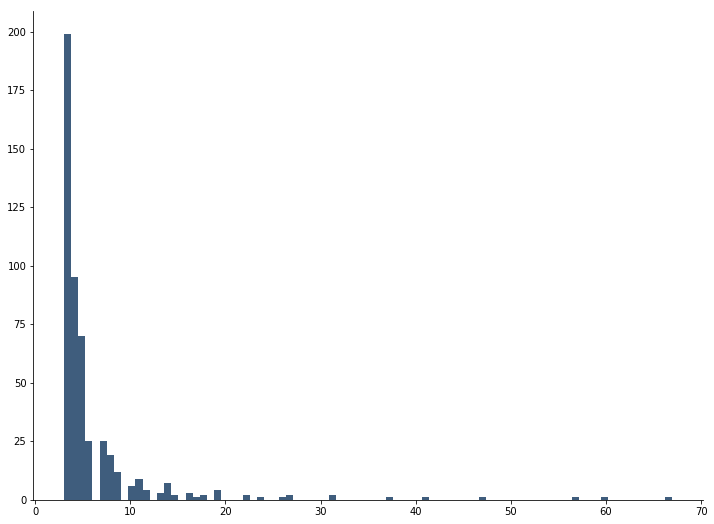

In [144]:
degs = [i[1] for i in sim_graph.degree()]
fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left

ax.hist(degs, color="#3F5D7D", bins='auto');

As you can see, there are only very few vertices with high degrees, and many with relatively small degrees -- a typical results for social networks.
In such cases, we say that the degree distribution is *heavy tailed*.

## Get information on the vertex level

**Neighborhood**

The neighborhood of vertex $v_i$ is the set of all vertices that are adjacent to $v_i$.

It is given by the function `nx.all_neighbors`, which takes two argument: first the graph, then the vertex:

In [152]:
nx.all_neighbors(sim_graph, "1") # use list comprenehsion to show all neighbors

**Connectedness**

Two vertices are connected of there is a path between then, i.e.:

$$d(v_i, v_j)\neq \infty$$

To investigate this, we use the function `nx.has_path`, where the first argument is the graph and the second and third argument the vertices in question:

In [154]:
nx.has_path(sim_graph, "0", "1")

True

**Distance between two vertices**

In an unweighted graph, the distance between two vertices is the length of the shortest path between them.
In a weighted graph, it is usually the sum of the edge weights between the two vertices.

It is computed via the function `nx.shortest_path`, which takes three arguments: first, the graph, second, the origin vertex, and third, the destination vertex:

In [155]:
nx.shortest_path(sim_graph, "0", "1")

['0', '3', '1']

**Clustering coefficient**

The clustering coefficient of a single vertex informs us about how well the neighbors of the vertex are themselves connected. 
The maximum amount of clustering is achieved if all neighbors of the vertex are neighbores as well:

$$cc(v_i)=\frac{2 \sum_{jk}a_{ij}a_{jk}a_{kj}}{\delta(v_i(\delta(v_i)-1)}$$

It is calculated using the function `nx.clustering`, which takes as a first argument the graph in question, and the vertex as a second argument:

In [157]:
nx.clustering(sim_graph, "0")

0.04516129032258064

**Degree**
The degree of $v_i$ is just the number of adjacent vertices.

In a weighted network we usually speak of **strength**, which is the sum of the weights of all edges.

In directed networks one might distinguish between **in-** and **out-degree**, where the former only counts edges that are pointing towards $v_i$.


In [158]:
sim_graph.degree("0")

31

**Eigenvector Centrality**

The centrality of a vertex measures its structural importance -- although keep in mind that the adequace of this link in the end depends on how exactly you define 'importance'.

Of course, the simplest measure of influence of a vertex could be its degree as defined above, but it often turns out that in practice degree is of less importance.
More informative is a second order measure, according to which the degrees of a node are weighted by the degree of the connected node. 
In other words: the connection to a vertex that has many degrees counts more than a connection to a vertex with few connections.
This logic leads to the concept of **eigenvector centrality** because the recursive calculation of importance can be expressed as the problem of finding an eigenvector.
There are different ways of calculating this, one of the most well-known is the PageRank algorithm, which underlies the Google Search Engine and determines which websites are ranked highest in search results.

In networkx, we can get the eigenvector centrality of a vertex using the function `eigenvector_centrality`, which takes one mandatory argument, the graph, and returns a dictionary containing the eigenvector centrality for each vertex in the graph.

This might then be visualized using a histogram:

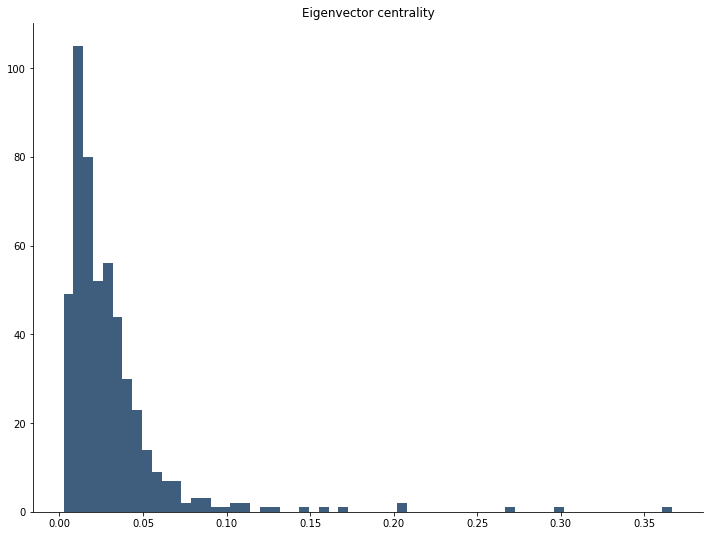

In [165]:
eigen_centralities = nx.eigenvector_centrality(sim_graph).values()

fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.set_title("Eigenvector centrality")

ax.hist(eigen_centralities, color="#3F5D7D", bins='auto');

Btw, centrality and its impact on influence (a measures of *dynamic* importance) is a very interesting area of social reseach.
For example, in communication networks such as Twitter, it is not so important what degree a single node has. 
More important is the number of degrees the neigbors or a vertex have.
In the Twitter example: a strong 'opinion maker' or 'influencer' is not necessarilty characterized by many followers. She is characterized by the fact that her followers have many followers.

You might check out this [funny video](https://www.youtube.com/watch?v=lbaemWIljeQ) illustrating the idea (I stole this one from [Aaron Clauset](http://tuvalu.santafe.edu/~aaronc/), and its actually from [this TED talk](https://www.youtube.com/watch?v=V74AxCqOTvg)).

**Betweeness Centrality**

Another interpretation of structural importance is the following:
a vertex is important when it connects two large communities, which would remain unconnected if the vertex was not there.

For example, a scientist might be structurally important if she links two otherwise unconnected research communities.

This can be measures using the concept of *betweeness centrality*.

This can be done using the function `betweenness_centrality`, which works similar to the one for eigenvector centrality:

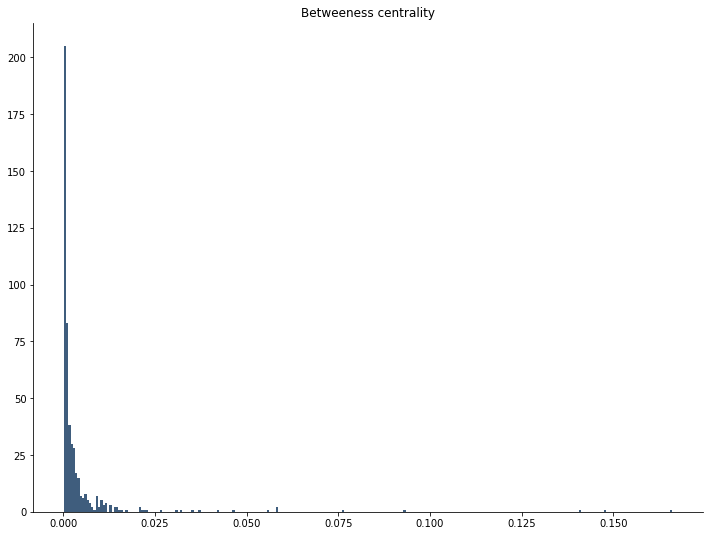

In [167]:
between_centralities = nx.betweenness_centrality(sim_graph).values()

fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.set_title("Betweeness centrality")

ax.hist(between_centralities, color="#3F5D7D", bins='auto');

# Some remarks on visualization
Although graph visualization is one of the weaknesses of networkx, some simple visualizations are possible.

If you really want to make nice vidualizations you should look for specific software packages, dedicated to this task.

For now we just take a simple look on how we can ploat networkx graphs using `matplotlib`.
For more inspiration, you might want to have a look at the examples in the [networkx visualization gallery](https://networkx.github.io/documentation/stable/auto_examples/index.html).

The relevant function here is `draw_networkx` or one of its many aliases.

The most commonly used arguments to the function are:

- The graph
- `with_labels`: can be `True` or `False`, depending on whether you want the labels to be drawn
- `pos`: the layout according to which the vertices should be arranged in the figure (see [here](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) for a small overview).
- `ax`: can be an `axes` object as produced by matplotlib; useful if you want to draw several plots within one figure
- `node_size`: either a number specifying vertex size for all vertices; or a list of the length of all vertices; useful if you want to draw vertices according to their degree, for example
- `node_color`: the color for the vertices
- `width`: the line width for the edges
- `style`: the stlye for the edges (e.g. dashed, solid, of dotted)
- `font_size` and `font_color`: specifies color and size for the fonts
- `alpha`: sets the transparency
- More keywords not so commonly used. Check the help function for further details.


As an example, we visualize the pre-defined graph of the *Davis Southern women network*,
a graph representing the friendship network of members in [Zachary's Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club),
and we plot the labels, choose a nice color for the nodes (using the very useful [color picker](https://www.w3schools.com/colors/colors_picker.asp)), and set all the other keywords, except `pos`:

Text(0.5,1,"Zachary's Karate Club friendship network")

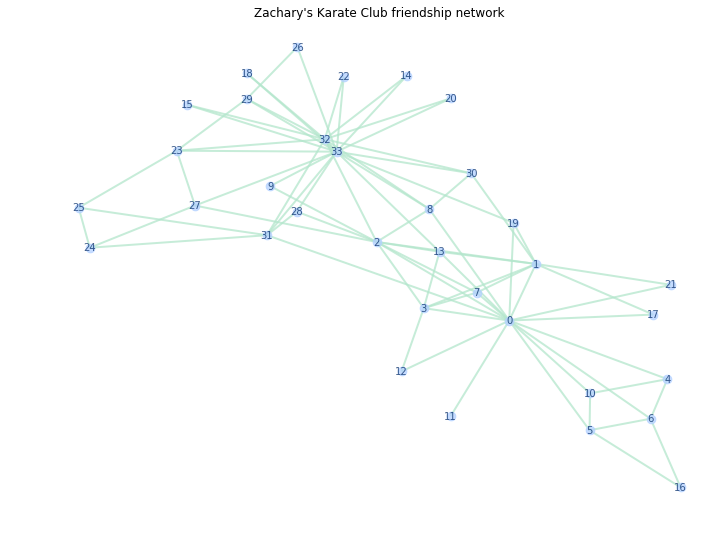

In [186]:
soc_graph = nx.nx.karate_club_graph()

fig, ax = plt.subplots(figsize=(12, 9))
nx.draw(soc_graph, 
        with_labels=True,
        ax=ax, 
        node_size=75, 
        node_color='#b3d1ff', 
        edge_color="#b3e6cc",
        width =2.0,
        stype= "dashed",
        font_size=10.0,
        font_color="#002966",
        alpha=0.75)
ax.set_title("Zachary's Karate Club friendship network")


Here are two representations, one where node sizes depend on degree, the other where they depend on eigenvector centrality:

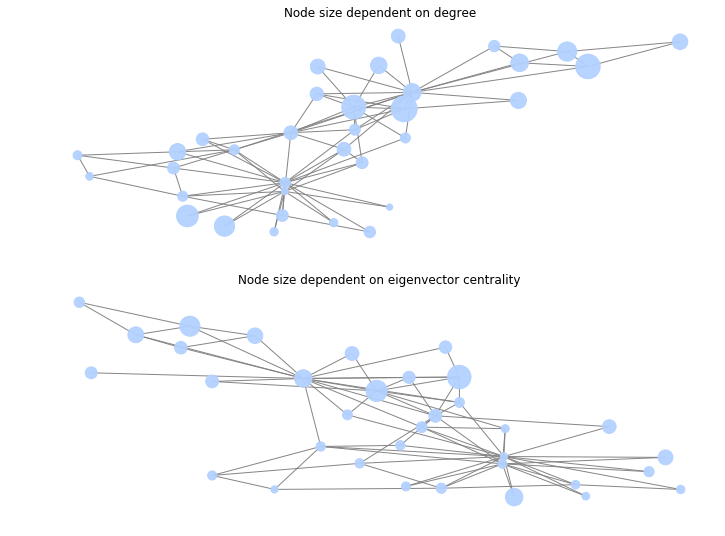

In [208]:
fig, axes = plt.subplots(2,1, figsize=(12, 9))
nx.draw(soc_graph, 
        with_labels=False,
        pos=nx.spring_layout(soc_graph),
        ax=axes[0], 
        node_size=[i[1]*10 for i in sim_graph.degree()],
        node_color='#b3d1ff', 
        edge_color="grey",
        alpha=0.95)
axes[0].set_title("Node size dependent on degree")
nx.draw(soc_graph, 
        with_labels=False,
        pos=nx.spring_layout(soc_graph),
        ax=axes[1], 
        node_size=[i*1500 for i in nx.eigenvector_centrality(sim_graph).values()],  
        node_color='#b3d1ff', 
        edge_color="grey",
        alpha=0.95)
axes[1].set_title("Node size dependent on eigenvector centrality");

Visualizing graphs is very difficult.
The following figure illustrates how different the same graph can look like if different layouts are used.

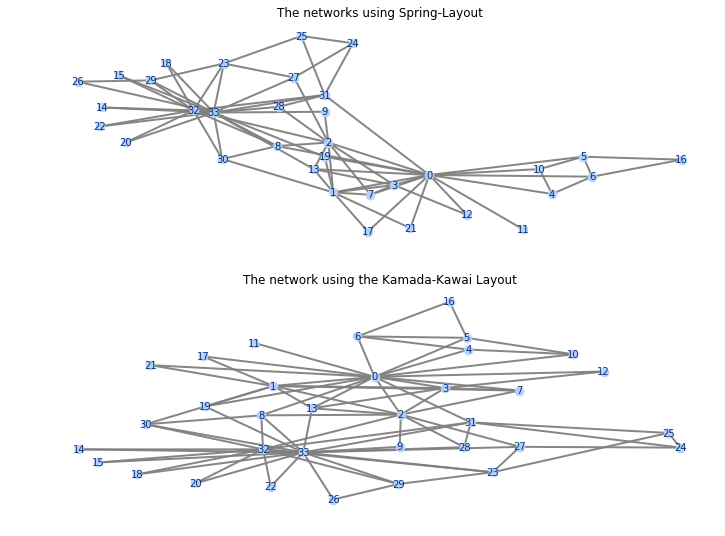

In [209]:
fig, axes = plt.subplots(2,1, figsize=(12, 9))
nx.draw(soc_graph, 
        with_labels=True,
        pos=nx.spring_layout(soc_graph),
        ax=axes[0], 
        node_size=75, 
        node_color='#b3d1ff', 
        edge_color="grey",
        width =2.0,
        stype="dashed",
        font_size=10.0,
        font_color="#002966",
        alpha=0.95)
axes[0].set_title("The networks using Spring-Layout")
nx.draw(soc_graph, 
        with_labels=True,
        pos=nx.kamada_kawai_layout(soc_graph),
        ax=axes[1], 
        node_size=75, 
        node_color='#b3d1ff', 
        edge_color="grey",
        width =2.0,
        stype= "dashed",
        font_size=10.0,
        font_color="#002966",
        alpha=0.95)
axes[1].set_title("The network using the Kamada-Kawai Layout");